# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [132]:
# Leitura da base de dados que teve primeira etapa de Pré Processamento feita no módulo passado
df = pd.read_csv("CHURN_CREDIT_MOD15_PART2.csv", delimiter=',')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,Yes,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,Yes,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,8191-XWSZG,F,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,NaN,1022.95,No
5,9959-WOFKT,Male,0,No,Yes,71,Yes,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),NaN,7382.25,No
6,4190-MFLUW,F,0,Yes,Yes,10,Yes,DSL,No,Yes,No,Month-to-month,Credit card (automatic),NaN,528.35,Yes
7,4183-MYFRB,F,0,No,No,21,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,1862.90,No
8,8779-QRDMV,Male,1,No,No,1,Yes,DSL,No,No,No,Month-to-month,Electronic check,NaN,39.65,Yes
9,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),NaN,202.25,No


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [134]:
# A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

# Descrição das variáveis em forma quantitativa
df.describe()

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2175.000000,2488.000000
mean,0.161576,32.352090,65.607563,2290.087178
std,0.368135,24.636885,29.931520,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,39.500000,402.337500
50%,0.000000,29.000000,71.450000,1402.900000
75%,0.000000,56.000000,90.250000,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


## B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

# Justificativa: 
Até onde entendi da aula de Análise Univariada, eu não identifiquei variáveis com Outliers.

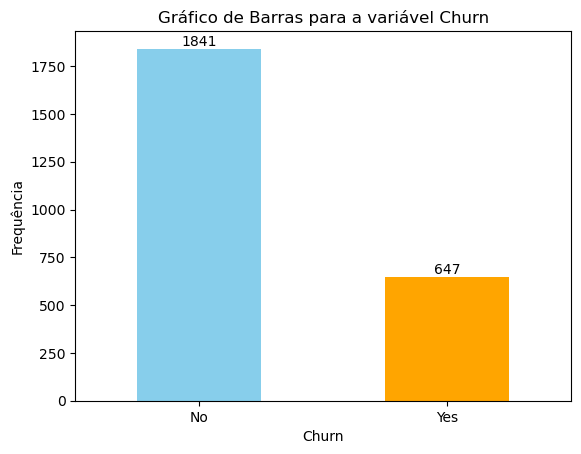

In [136]:
# C) Plot gráficos que considerar importante para completar sua análise univariada.

# Contagem dos valores da coluna Churn
contagem_churn = df['Churn'].value_counts()

# Calculando a porcentagem da coluna Churn
porcentagem_churn = (contagem_churn / contagem_churn.sum()) * 100
ax = contagem_churn.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Gráfico de Barras para a variável Churn')
plt.xlabel('Churn')
plt.ylabel('Frequência')

# Ajustando a rotação dos rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adicionando os valores exatos em cima de cada barra
for i, valor in enumerate(contagem_churn):
    ax.text(i, valor + 0.5, str(valor), ha='center', va='bottom')

plt.show()

In [138]:
# Contando as ocorrências entre Churn e não Churn
contagem_churn = df['Churn'].value_counts()

# Calculando a porcentagem
(contagem_churn / contagem_churn.sum()) * 100

Churn
No     73.995177
Yes    26.004823
Name: count, dtype: float64

## Insight sobre a coluna Churn

Podemos identtificar com o gráfico que o Churn está em 26%, o que é um número que precisa ser avaliado dentro do mercado que a empresa está inserida, para identificar se esse percentual de Churn é aceitável.

Outro ponto que podemos usar com esse percentual, é que pode ser feito mais trabalho de fidelização dos clientes para que se consiga diminuir os custos de aquisição de novos clientes, se esse tiver um CAC muito elevado.

In [140]:
# Removendo valores indesejados na coluna 'Genero'
df = df[~df['Genero'].isin(['F', 'f', 'M'])]

# Quando executei o código abaixo, encontrei mais nomenclaturas para a coluna Gênero.

Como eu vi que o percentual dessas três nomenclaturas somadas era de 0,48% do total de dados, resolvi excluir antes de plotar o gráfico de Gênero novamente.

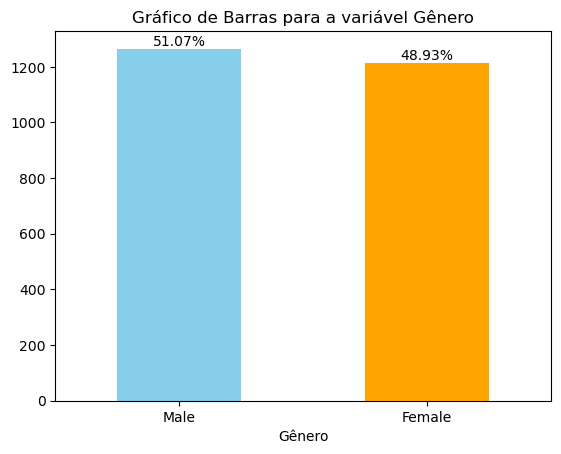

In [142]:
# Contagem dos valores da coluna Genero
contagem_genero = df['Genero'].value_counts()

# Calculando a porcentagem da coluna Genero
porcentagem_genero = (contagem_genero / contagem_genero.sum()) * 100

# Criando o gráfico de barras
ax = contagem_genero.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Gráfico de Barras para a variável Gênero')
plt.xlabel('Gênero')

# Ajustando a rotação dos rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adicionando porcentagem nas barras
for i, v in enumerate(contagem_genero):
    ax.text(i, v + 1, f'{porcentagem_genero.iloc[i]:.2f}%', ha='center', va='bottom')

plt.show()


## Insight coluna Gênero

Podemos identificar que está bem balanceado entre os dois gêneros. Com isso sabemos que podemos manter uma abordagem inclusiva na hora de fazer uma ação de marketing por exemplo.

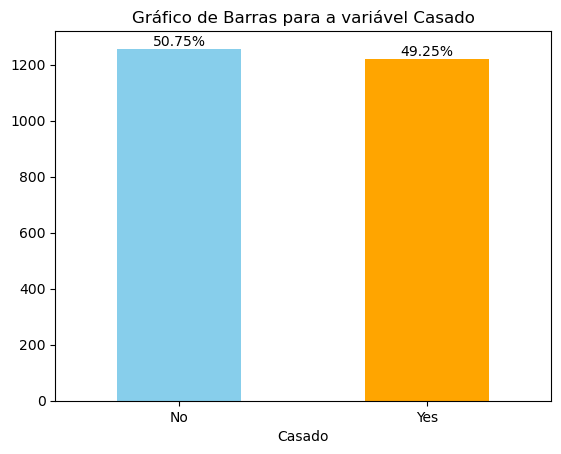

In [144]:
# Contagem dos valores da coluna Casado
contagem_casado = df['Casado'].value_counts()

# Calculando a porcentagem da coluna Casado
porcentagem_casado = (contagem_casado / contagem_casado.sum()) * 100

# Criando o gráfico de barras
ax = contagem_casado.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Gráfico de Barras para a variável Casado')
plt.xlabel('Casado')

# Ajustando a rotação dos rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adicionando porcentagem nas barras
for i, v in enumerate(contagem_casado):
    ax.text(i, v + 1, f'{porcentagem_casado.iloc[i]:.2f}%', ha='center', va='bottom')

plt.show()

## Insight sobre a coluna Casado

Conseguimos ver que o produto acaba agradando tanto casados como não casados, isso pode ser usado em ações de marketing e publicidade como um ponto forte para mostrar que o serviço é inclusivo e amplamente acessível.

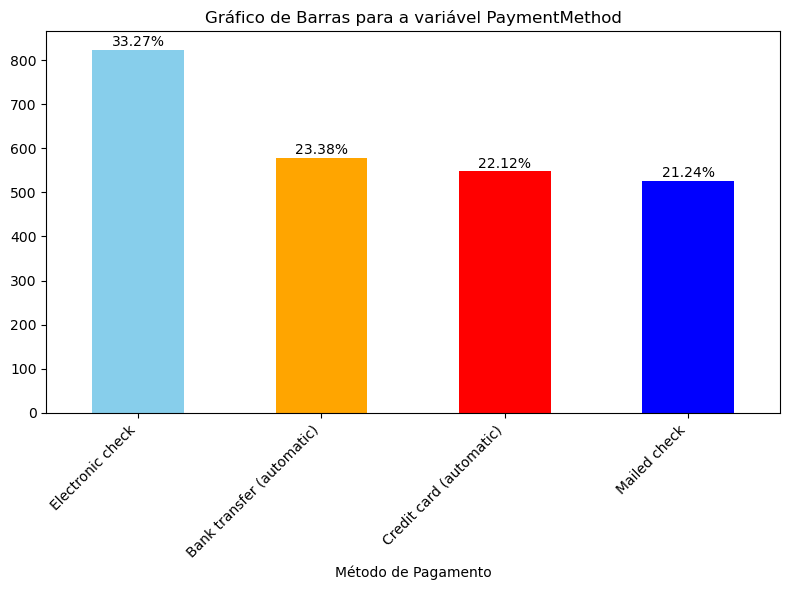

In [146]:
# Contagem dos valores da coluna PaymentMethod
contagem_pagamento = df['PaymentMethod'].value_counts()

# Calculando a porcentagem da coluna PaymentMethod
porcentagem_pagamento = (contagem_pagamento / contagem_pagamento.sum()) * 100

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
ax = contagem_pagamento.plot(kind='bar', color=['skyblue', 'orange', 'red', 'blue'])
plt.title('Gráfico de Barras para a variável PaymentMethod')
plt.xlabel('Método de Pagamento')

# Ajustando a rotação dos rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adicionando porcentagem nas barras
for i, v in enumerate(contagem_pagamento):
    ax.text(i, v + 1, f'{porcentagem_pagamento.iloc[i]:.2f}%', ha='center', va='bottom')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

plt.show()

## Insight sobre a coluna PaymentMethod

Com a informação que temos através dos percentuais, identificamos a maior e menor preferência de pagamento entre os clientes. Com isso podemos usar estratégia de segmentação personalizado para cada tipo de cliente. 

Outra estratégia que podemos utilizar focado nas pessoas que possuem pagamentos de forma manual, é entender através de pesquisas, o porque da preferência de pagamento manual, e com isso tentar trazer clientes que continuam com a forma manual de pagamento para forma eletrônica e automática, mostrando os benefícios dessa troca.

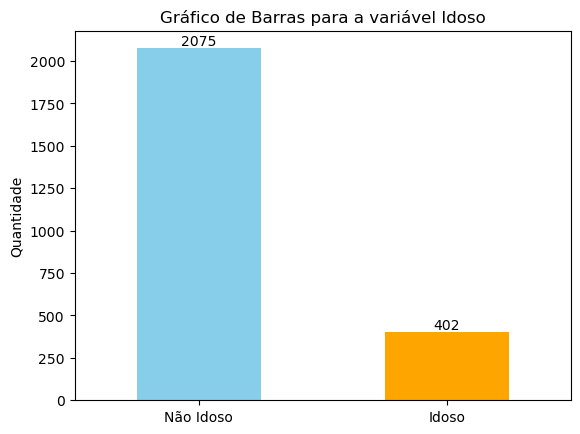

In [148]:
# D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

# Contagem dos valores da coluna Idoso
contagem_idoso = df['Idoso'].value_counts()

# Renomeando os índices para "Idoso" e "Não Idoso"
contagem_idoso.index = ['Não Idoso', 'Idoso']

# Calculando a porcentagem da coluna Idoso
porcentagem_idoso = (contagem_idoso / contagem_idoso.sum()) * 100
ax = contagem_idoso.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Gráfico de Barras para a variável Idoso')
plt.ylabel('Quantidade')

# Ajustando a rotação dos rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adicionando os valores exatos em cima de cada barra
for i, valor in enumerate(contagem_idoso):
    ax.text(i, valor + 0.5, str(valor), ha='center', va='bottom')
    
plt.show()

In [150]:
# Contando as ocorrências entre idoso e não idoso
contagem_idoso = df['Idoso'].value_counts()

# Calculando a porcentagem
(contagem_idoso / contagem_idoso.sum()) * 100

Idoso
0    83.77069
1    16.22931
Name: count, dtype: float64

O que conseguimos identificar é que 83,77% dos clientes não é idoso, mostrando que a variável booleana não está balanceada.

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


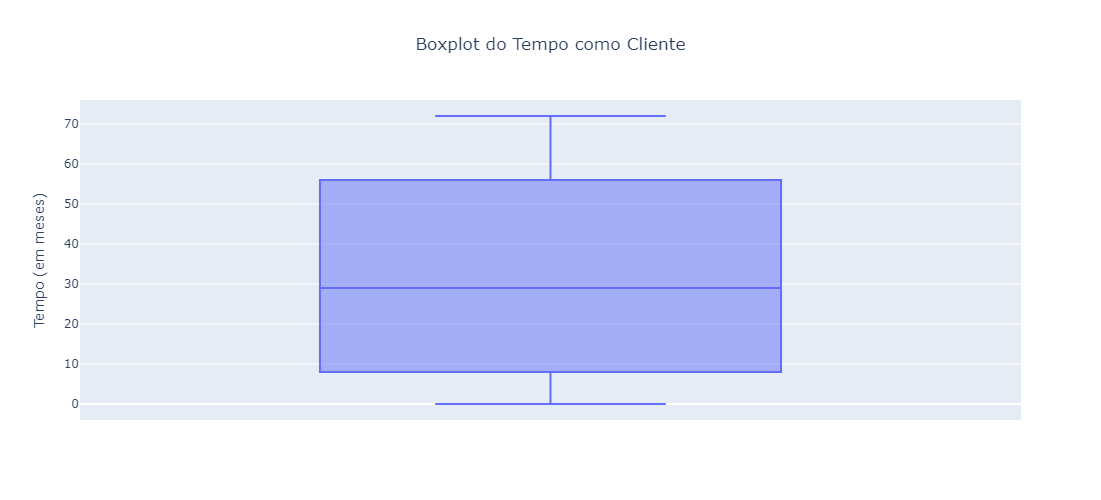

In [152]:
# Criando o boxplot para a coluna 'Tempo_como_Cliente'
fig = px.box(df, y='Tempo_como_Cliente', title='Boxplot do Tempo como Cliente')

# Personalizações no layout
fig.update_layout(
    yaxis_title='Tempo (em meses)',
    title_x=0.5,
    width=800,
    height=500
)

# Exibindo o gráfico
fig.show()

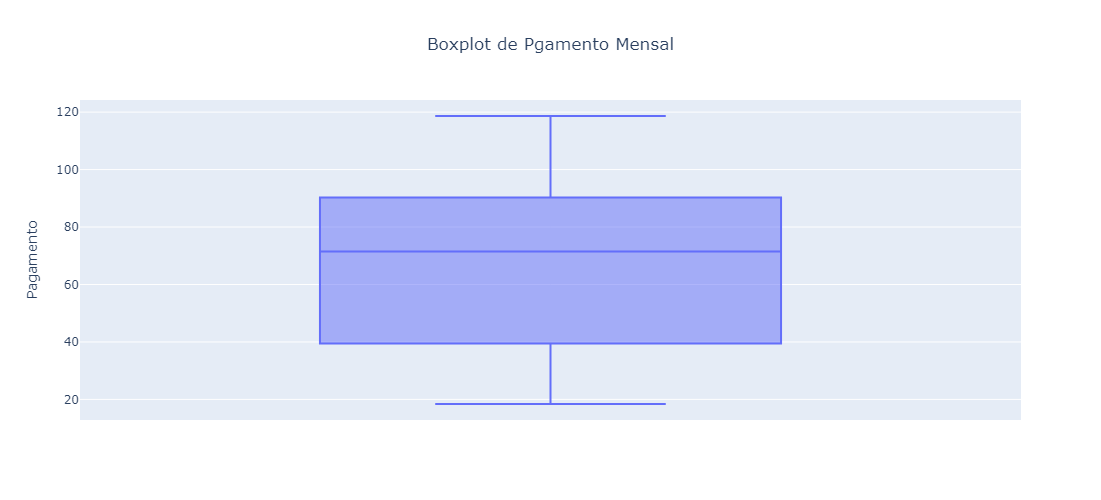

In [154]:
# Criando o boxplot para a coluna 'Pagamento_Mensal'
fig = px.box(df, y='Pagamento_Mensal', title='Boxplot de Pgamento Mensal')

# Personalizações no layout
fig.update_layout(
    yaxis_title='Pagamento',
    title_x=0.5,
    width=800,
    height=500
)

# Exibindo o gráfico
fig.show()

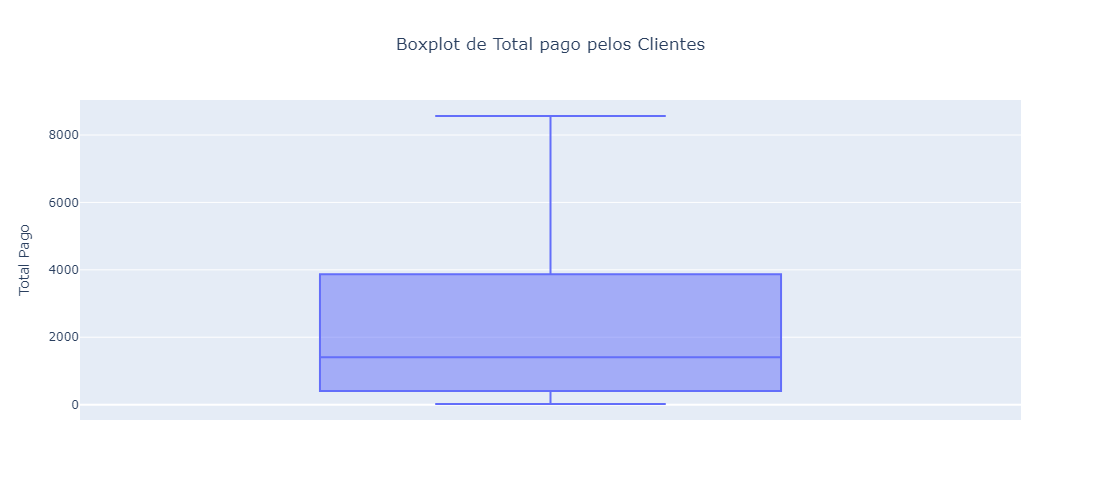

In [156]:
# Criando o boxplot para a coluna 'Total_Pago'
fig = px.box(df, y='Total_Pago', title='Boxplot de Total pago pelos Clientes')

# Personalizações no layout
fig.update_layout(
    yaxis_title='Total Pago',
    title_x=0.5,
    width=800,
    height=500
)

# Exibindo o gráfico
fig.show()

## Justificativa sobre os gráficos Boxplot

Os primeiros dois gráficos, pelo meu entendimento demonstram estar com os dados relativamente bem distribuidos.

# Justificativa Boxplot 'Total Pago pelos Clientes'

Resolvi não fazer nenhuma alteração nos dados, levando em consideração o que foi mostrado no módulo sobre dados para um modelo de Machine Learning, que pode resultar em um modelo melhor se deixarmos os dados que não estejam bem distribuidos, deixando o modelo mais "afiado" para conseguir prever comportamentos quando eles serem mais discrepantes do que temos na média.

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

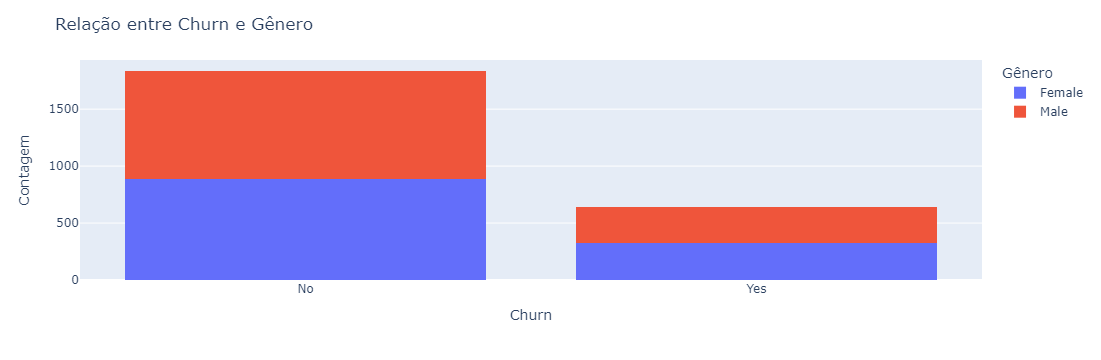

In [158]:
# Gráfico de Relação de Churn entre Gênero
fig = px.histogram(df, x='Churn', color='Genero', barmode='stack')

# Layout do Gráfico
fig.update_layout(title='Relação entre Churn e Gênero',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Gênero')
fig.show()

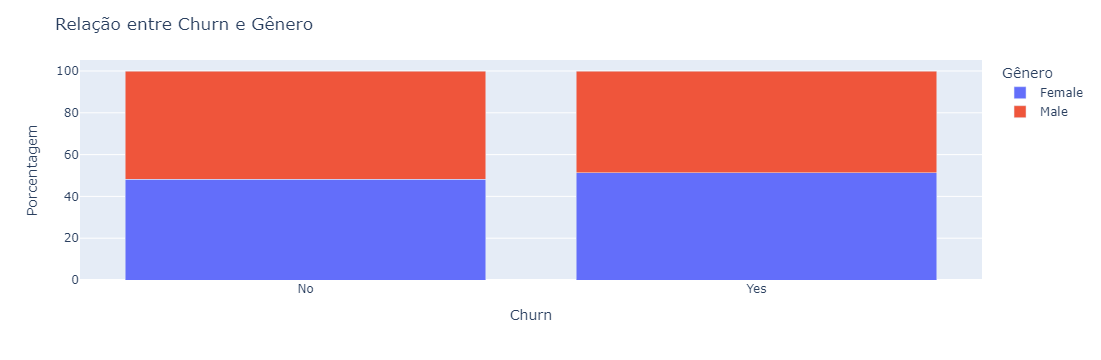

In [160]:
# Calcula a porcentagem de cada categoria
df_grouped = df.groupby(['Churn', 'Genero']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Churn', y='percent', color='Genero', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Genero': 'Gênero'})

fig.update_layout(title='Relação entre Churn e Gênero',
                  yaxis_title='Porcentagem',
                  legend_title='Gênero')
fig.show()

## Insight sobre relação entre Churn e Gênero

Com o gráfico, conseguimos notar que embora o público feminino dê mais churn, os dados mostram um equilibro entre público masculino e feminino nesse quesito.

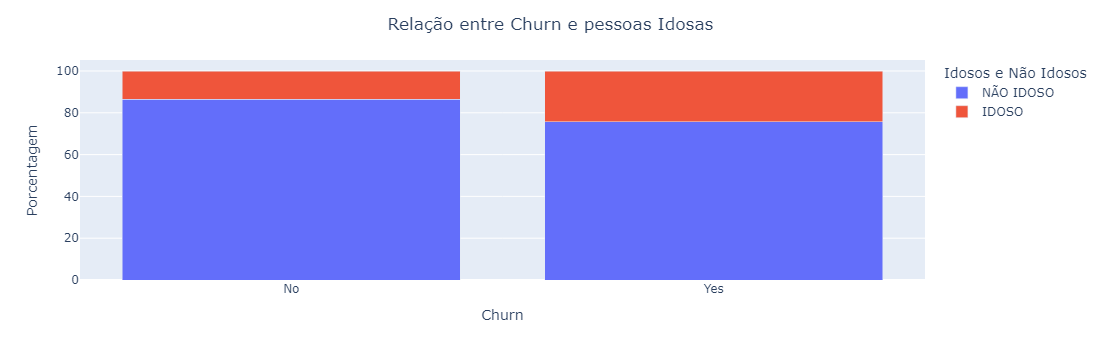

In [162]:
# Calcula a porcentagem de cada categoria
df_grouped = df.groupby(['Churn', 'Idoso']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Renomeia os valores da coluna 'Idoso' para 'IDOSO' e 'NÃO IDOSO'
df_grouped['Idoso'] = df_grouped['Idoso'].map({0: 'NÃO IDOSO', 1: 'IDOSO'})

# Gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Churn', y='percent', color='Idoso', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Idoso': 'Idoso'})

fig.update_layout(
    title={
        'text': 'Relação entre Churn e pessoas Idosas',  # Título do gráfico
        'x': 0.5,  # Centraliza horizontalmente
        'y': 0.95,  # Posiciona o título próximo ao topo
        'xanchor': 'center',  # Alinhamento horizontal
        'yanchor': 'top'  # Alinhamento vertical
    },
    yaxis_title='Porcentagem',
    legend_title='Idosos e Não Idosos'
)
fig.show()

## Insight sobre Churn entre pessoas Idosas e Não Idosas

Aqui identificamos que embora os Idosos representem apenas 13% dos clientes, eles representam praticamente 25% dos Churns. O que demonstra a necessidade de entender junto a essa parcela dos clientes, através de uma pesquisa, e estratégias de publicidade e marketing para diminuir a quantidade de churn.

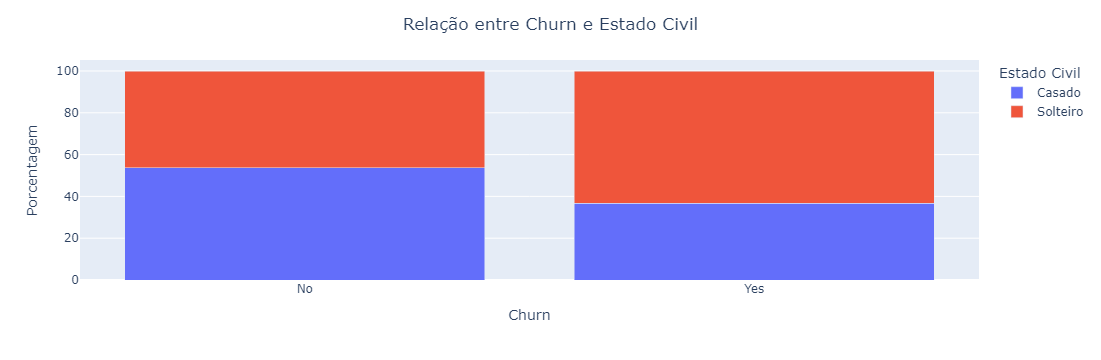

In [164]:
# Remove espaços em branco e padroniza os valores
df['Casado'] = df['Casado'].str.strip().str.lower()  # Remove espaços e converte para minúsculas
df['Casado'] = df['Casado'].fillna('não informado')  # Preenche valores nulos com 'Não Informado'

# Substitui os valores 'yes' e 'no' por 'Casado' e 'Solteiro'
df['Casado'] = df['Casado'].map({'yes': 'Casado', 'no': 'Solteiro', 'não informado': 'Não Informado'})

# Calcula a porcentagem de cada categoria
df_grouped = df.groupby(['Churn', 'Casado']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Churn', y='percent', color='Casado', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Casado': 'Estado Civil'})

fig.update_layout(
    title={
        'text': 'Relação entre Churn e Estado Civil',
        'x': 0.5,  # Centraliza o título horizontalmente
        'y': 0.95,  # Posiciona o título próximo ao topo
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis_title='Porcentagem',
    legend_title='Estado Civil'
)
fig.show()

## Insight sobre relação entre Churn e Pessoas Casadas e Não Casadas

Conseguimos ver que a incidência de Churn é maior entre as pessoas solteiras. Estratégias que podem ser interessantes, seria segmentar as estratégias de marketing para solteiros, trazendo benefícios especificos para esse tipo de publico, tentando aumentar a fidelidade ao serivço.

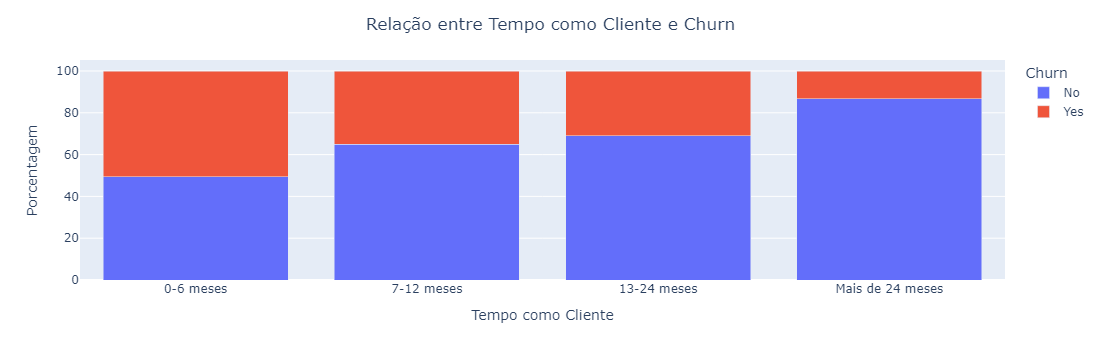

In [172]:
# Criação de grupos por tempo para trabalhar a relação Churn e tempo como cliente
bins = [0, 6, 12, 24, df['Tempo_como_Cliente'].max()]
labels = ['0-6 meses', '7-12 meses', '13-24 meses', 'Mais de 24 meses']
df['Tempo_Categorias'] = pd.cut(df['Tempo_como_Cliente'], bins=bins, labels=labels, include_lowest=True)

# Agrupa por Churn e Tempo_Categorias
df_grouped = df.groupby(['Churn', 'Tempo_Categorias'], observed=True).size().reset_index(name='count')

# Calcula a porcentagem de churn em cada categoria de tempo
total_por_categoria = df_grouped.groupby('Tempo_Categorias', observed=True)['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_categoria) * 100

# Gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Tempo_Categorias', y='percent', color='Churn', barmode='stack',
             labels={'Tempo_Categorias': 'Tempo como Cliente', 'percent': 'Porcentagem', 'Churn': 'Churn'})

fig.update_layout(
    title={
        'text': 'Relação entre Tempo como Cliente e Churn',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis_title='Porcentagem',
    legend_title='Churn'
)
fig.show()

## Insight sobre relação entre Churn e Tempo como Cliente

Aqui nesse gráfico, conseguimos ver que o maior índice de Churn está entre os clientes de 0-6 meses, representando 50% de Churn. Em contrapartida conseguimos observar também que os clientes com mais de 24 meses, são os que menos dão Churn, o que também valeria a pena fazer alguma ação que dê benefícios especiais para pessoas que já estão a mais tempo usando o serviço, diminuindo ainda mais a possibilidade da pessoa desistir do serviço

# Sobre os Clientes de 0-6 Meses

É importante enteder se esses clientes estão tendo dificuldade para entender a plataforma e serviços que são prestados pela empresa, isso pode estar sendo o problema pelo qual eles não continuam com o serviço. 

Outro ponto que podemos levantar com essa informaçõa, é que provavelmete não esá sendo chegado nas expectativas esperadas por esses novos clientes com relação ao serviço. Pode ser também que os concorrentes estão sendo mais atrativos com suas ofertas.

## Estratégias para os clientes 0-6 Meses

# Melhorar Onboarding
- tutorial para que facilite o entendimento do serviço;
- Suporte dedicado aos novos clientes nos primeiros meses
- Implementar estratégia de contato ativo, através de e-mail, telefone, para saber como está sendo a experiência nos primeiros 30-90 dias.


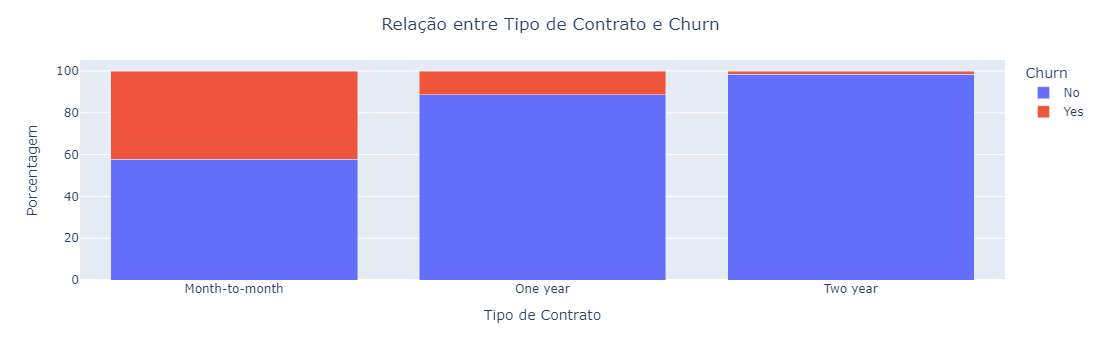

In [177]:
# Agrupa os dados por Tipo_Contrato e Churn
df_grouped = df.groupby(['Tipo_Contrato', 'Churn']).size().reset_index(name='count')

# Calcula a porcentagem de churn dentro de cada tipo de contrato
total_por_tipo_contrato = df_grouped.groupby('Tipo_Contrato')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_tipo_contrato) * 100

# Gráfico de barras empilhadas para mostrar a relação
fig = px.bar(df_grouped, x='Tipo_Contrato', y='percent', color='Churn', barmode='stack',
             labels={'Tipo_Contrato': 'Tipo de Contrato', 'percent': 'Porcentagem', 'Churn': 'Churn'})

fig.update_layout(
    title={
        'text': 'Relação entre Tipo de Contrato e Churn',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis_title='Porcentagem',
    legend_title='Churn'
)
fig.show()

## Insight sobre relação de Churn e Tipo de Contrato

Aqui vemos que onde mais temos Churn, é no tipo de contrato Month-to-Month, deixando a sugestão que a pessoa que recebe a cobrança mensalmente, tem uma tendência maior a desistir do serviço. 

Uma estratégia interessante, seria fazer uma ação para trazer esse grupo de clientes para o tipo de contrato pelo menos de um ano, onde os dados demonstram um nível de churn de menos de 12% contra os 42% apresentados no contrato Month-to-Month

Uma ação envolvendo um desoconto inicial para a pessoa alterar o contrato poderia ser uma alternativa interessante, demonstrar os benefícios de ser um cliente que muda o seu contrato para um ano ou dois.

# B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

Acredito que Tipo_Contrato e Tempo_como_Cliente sejam as variáveis mais importantes para vermos o Churn desse serviço. Com essas duas variáveis conseguimos ter uma visão interessante do que pode ser os maiores indicadores de Churn.

Com isso conseguimos ter insights importantes e montar estratégias para tentar diminuir essa quantidade de Churn que o serviço possui.